## A continuación se presenta el entrenamiento de diferentes modelos de ML para paredecir ataques en tráficos de Red. Para esto se disponen ya de dos dataset con los datos de Training y Test.

* Los Modelos desarrollado serán:

    Logistic Regression              
    Support Vector Machines linear   
    Support Vector Machines plonomial
    Support Vector Machines RBf      
    Decision Trees                   
    Random Forest                    
    Naive Bayes                      
    K-Nearest Neighbor    

* Dado las sugrencias del Profesor se implementará XGBoost para ver tambien su desempeño.
XGBClassifier   

* El target del modelo Y: Será bidimensional (Normal, Attack)

# Importamos las librerias y definimos el header de las columnas

In [ ]:
#loading and importing data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, roc_auc_score
import scipy
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler


# add the column labels
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])


# Cargamos los Dataset Train y Test

In [ ]:
df_train=pd.read_csv('./KDDTrain+.txt',header=None,names=columns)
df_test=pd.read_csv('./KDDTest+.txt',header=None,names=columns)

In [ ]:
df_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [ ]:
# information of our data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

# Revisamos los valores duplicadosduplicados

In [ ]:
print(df_train.duplicated().sum())
print(df_test.duplicated().sum())

0
0


In [ ]:
# Check for nissing data

# Revisamos si hay nulos

In [ ]:
df_train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

# Revisión de outliers

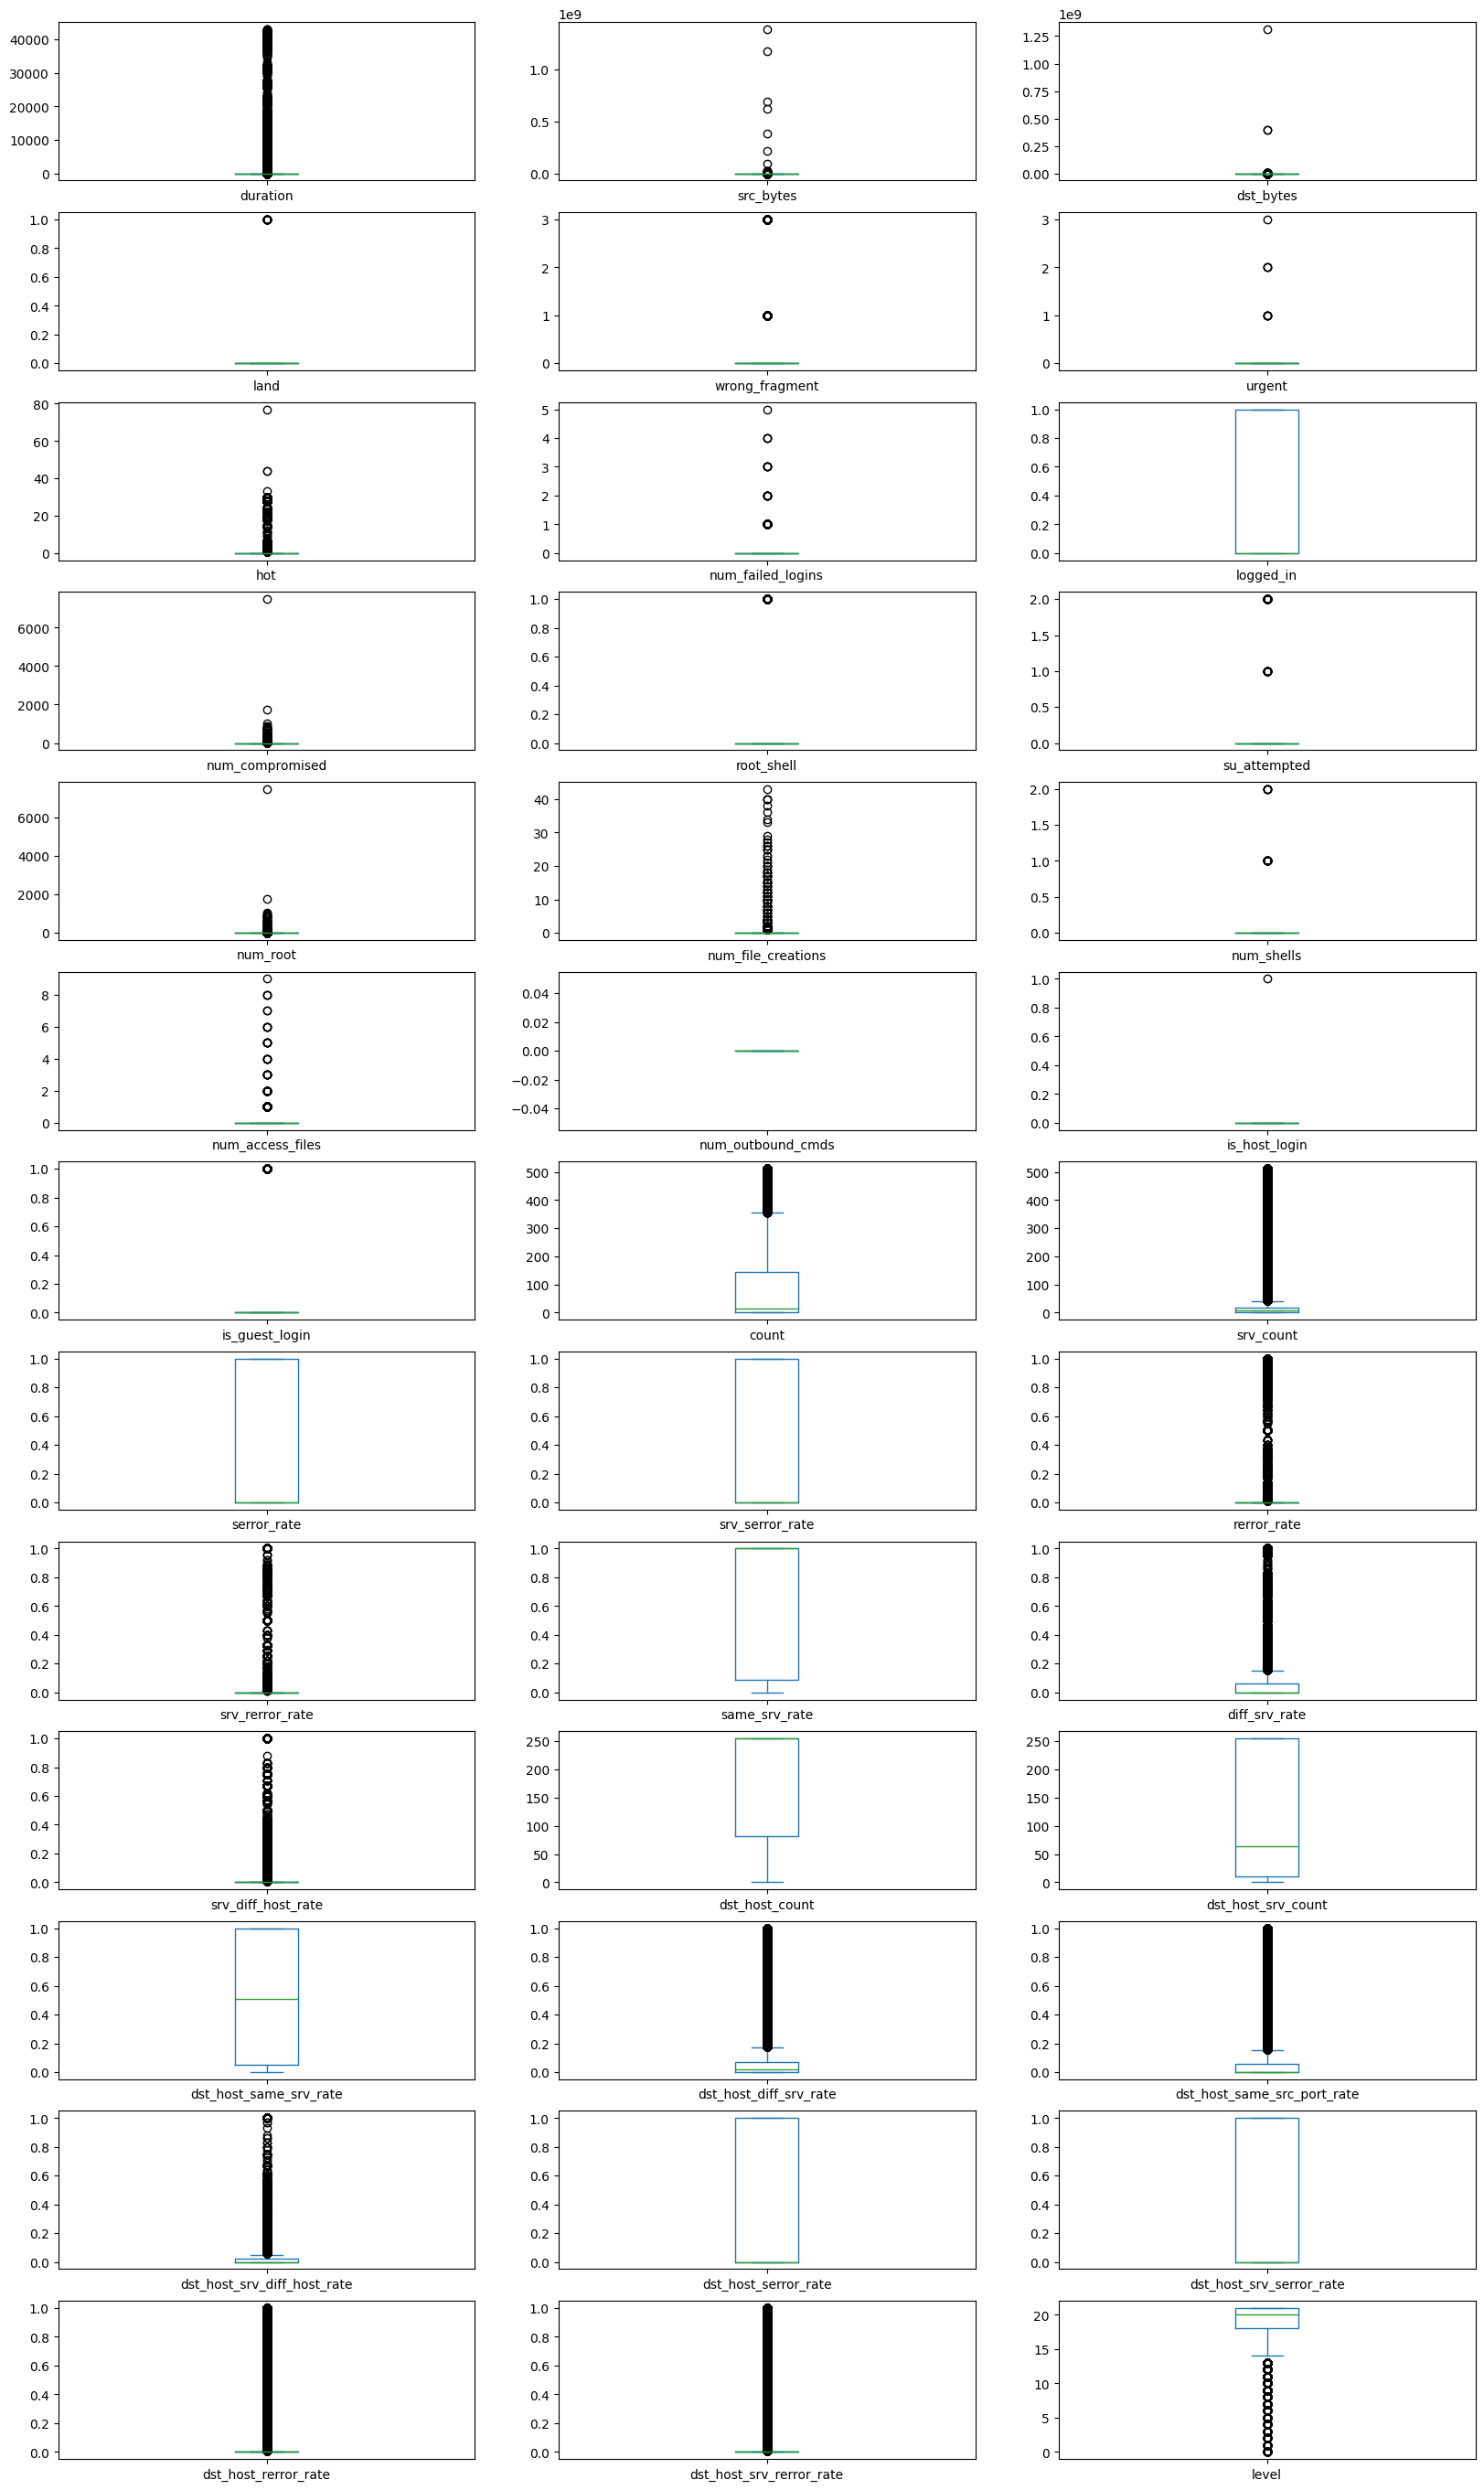

In [ ]:
#Boxplot of all columns to see outliers
df_train.plot(kind='box',subplots=True,layout=(15,3),figsize=(20,40))
plt.show()

# Definimos la variable de salida a bidimensional

In [ ]:
df_train['attack'].value_counts()

attack
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

In [ ]:

df_train["binary_attack"]=df_train.attack.map(lambda a: "normal" if a == 'normal' else "abnormal")
df_train.drop('attack',axis=1,inplace=True)

df_test["binary_attack"]=df_test.attack.map(lambda a: "normal" if a == 'normal' else "abnormal")
df_test.drop('attack',axis=1,inplace=True)

In [ ]:
df_train.select_dtypes(['object']).columns

Index(['protocol_type', 'service', 'flag', 'binary_attack'], dtype='object')

# Aplicamos encoding en las variables object

In [ ]:
# Label Encoder
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
clm=['protocol_type', 'service', 'flag', 'binary_attack']
for x in clm:
    df_train[x]=le.fit_transform(df_train[x])
    df_test[x]=le.fit_transform(df_test[x])


# Creamos los split de training / test

In [ ]:
#Spliting the data

x_train=df_train.drop('binary_attack',axis=1)
y_train=df_train["binary_attack"]

x_test=df_test.drop('binary_attack',axis=1)
y_test=df_test["binary_attack"]



# Revisión de feactures

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(x_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

src_bytes                      0.566915
service                        0.469269
dst_bytes                      0.440400
flag                           0.371125
same_srv_rate                  0.368289
diff_srv_rate                  0.360803
dst_host_srv_count             0.336552
dst_host_same_srv_rate         0.312136
logged_in                      0.293420
dst_host_serror_rate           0.288493
dst_host_diff_srv_rate         0.285660
dst_host_srv_serror_rate       0.282111
serror_rate                    0.278416
srv_serror_rate                0.268607
count                          0.265297
dst_host_srv_diff_host_rate    0.186812
level                          0.152563
dst_host_count                 0.143393
dst_host_same_src_port_rate    0.133619
srv_diff_host_rate             0.099533
srv_count                      0.063910
dst_host_srv_rerror_rate       0.061003
protocol_type                  0.053862
rerror_rate                    0.041194
dst_host_rerror_rate           0.039509


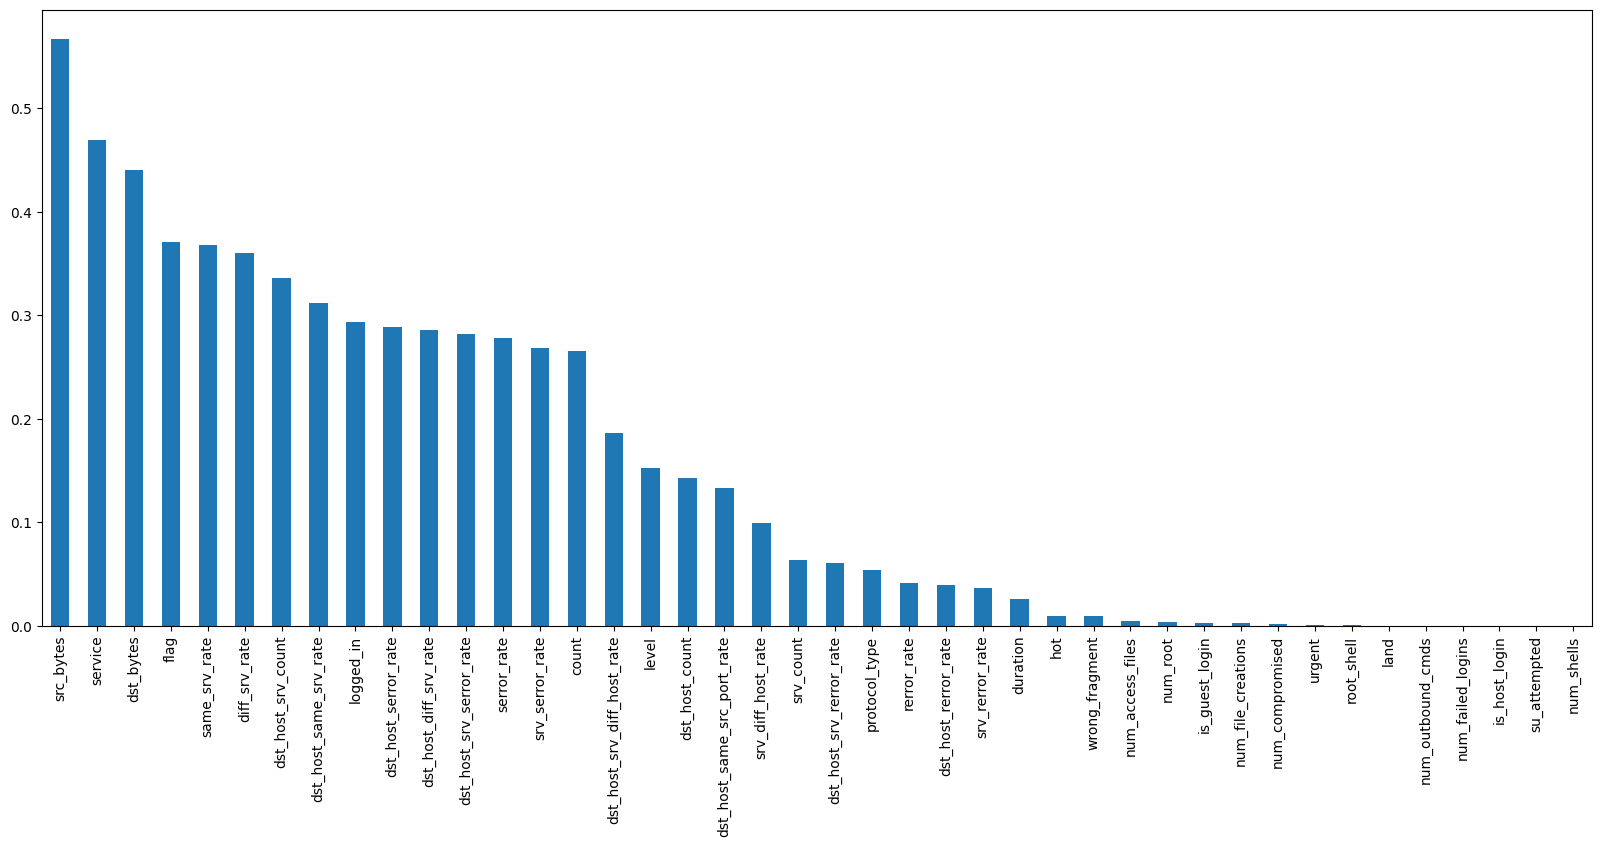

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8));


# Selección de variables predictoras

In [ ]:
# Seleccionamos 20 feactures
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_classif, k=20)
sel_five_cols.fit(x_train, y_train)
x_train.columns[sel_five_cols.get_support()]

Index(['service', 'flag', 'src_bytes', 'dst_bytes', 'logged_in', 'count',
       'serror_rate', 'srv_serror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'level'],
      dtype='object')

In [ ]:
col=['service', 'flag', 'src_bytes', 'dst_bytes', 'logged_in',
       'same_srv_rate', 'diff_srv_rate', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate']
x_train=x_train[col]
x_test=x_test[col]

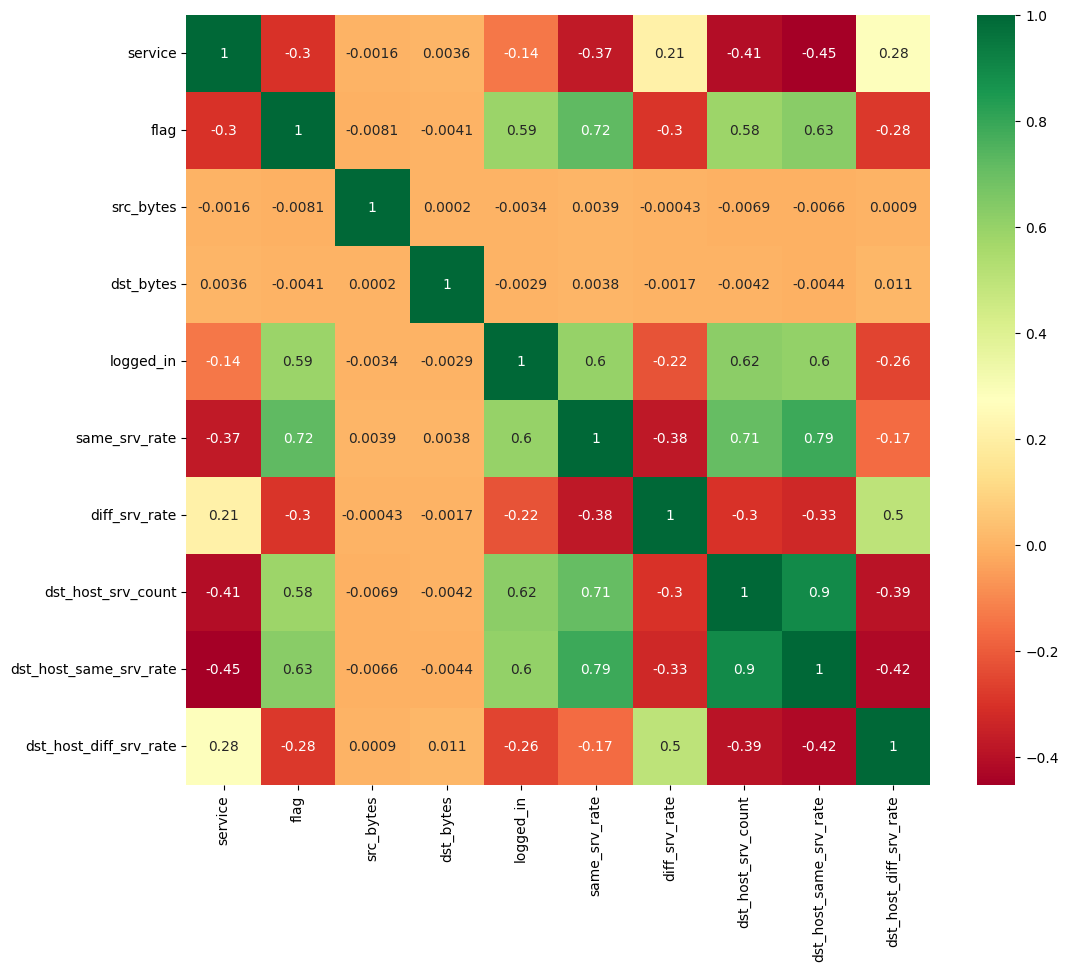

In [ ]:
plt.figure(figsize=(12,10))
p=sns.heatmap(x_train.corr(), annot=True,cmap ='RdYlGn')

# Aplicación de escalado

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.fit_transform(x_test)

# Aplicando modelos de  Binary classification models

In [ ]:
# we'll initialize each model and store it by name in a dictionary
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines linear'] = LinearSVC()
models['Support Vector Machines plonomial'] = SVC(kernel='poly')
models['Support Vector Machines RBf'] =  SVC(C=100.0)

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier(max_depth=3)

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier(n_neighbors=20)



In [ ]:
Caculamos accuracy, presicion y recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():

    # Fit the classifier
    models[key].fit(x_train, y_train)

    # Make predictions
    predictions = models[key].predict(x_test)

    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

In [ ]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.717131,0.943981,0.611133
Support Vector Machines linear,0.723873,0.955617,0.615630
Support Vector Machines plonomial,0.764416,0.962723,0.653868
Support Vector Machines RBf,0.772933,0.957368,0.663977
Decision Trees,0.751153,0.933375,0.646182
Random Forest,0.743834,0.971991,0.631709
Naive Bayes,0.546265,0.440634,0.471463
K-Nearest Neighbor,0.788946,0.962002,0.680358


# Resultados de los modelos

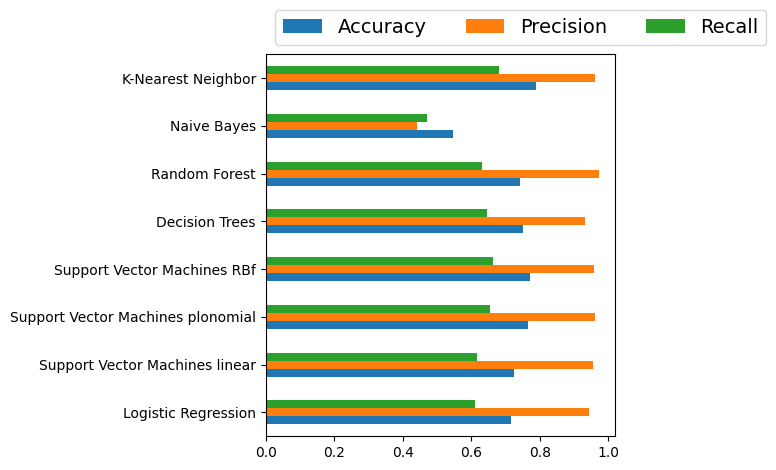

In [ ]:
ax = df_model.plot.barh()
ax.legend(
    ncol=len(models.keys()),
    bbox_to_anchor=(0, 1),
    loc='lower left',
    prop={'size': 14}
)
plt.tight_layout()

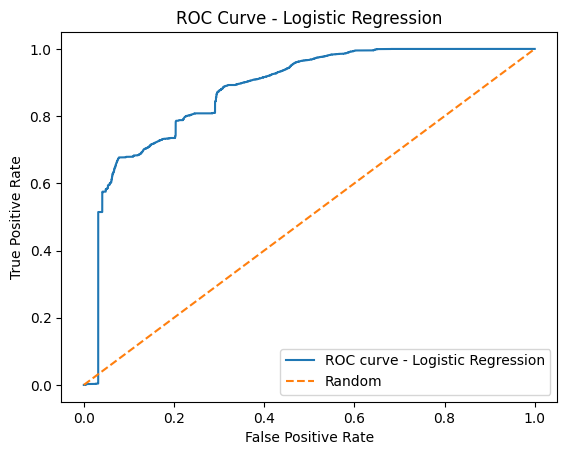

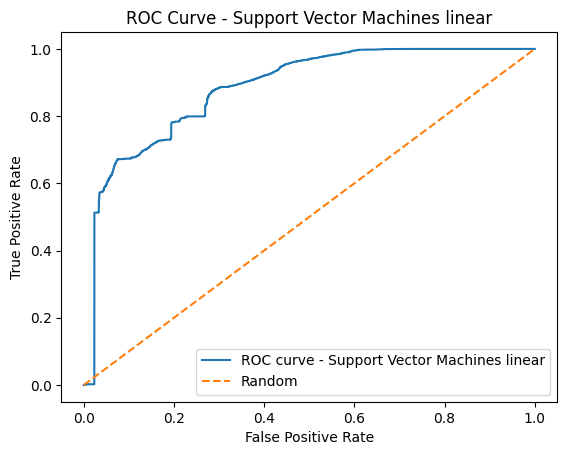

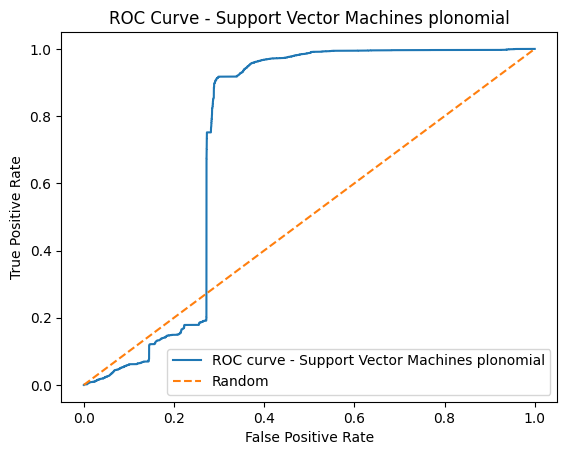

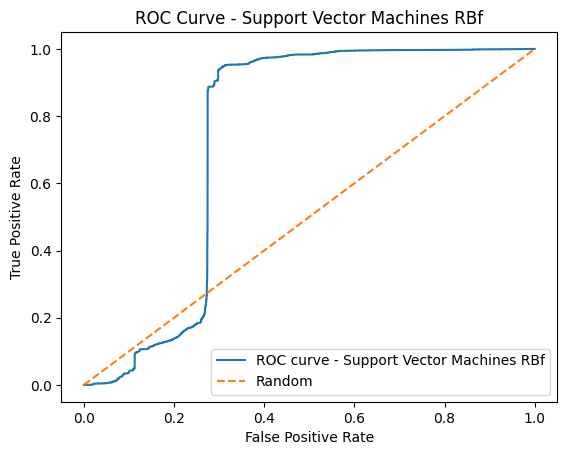

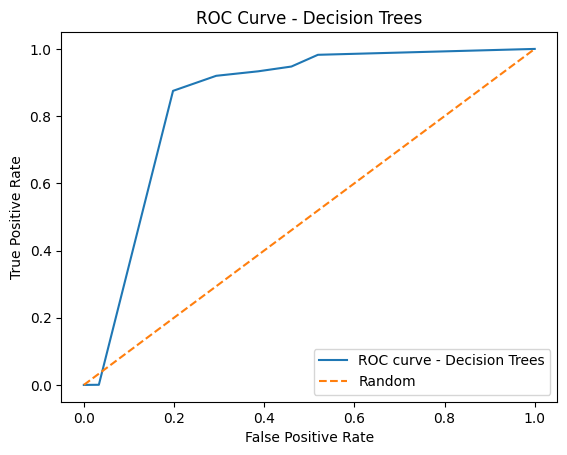

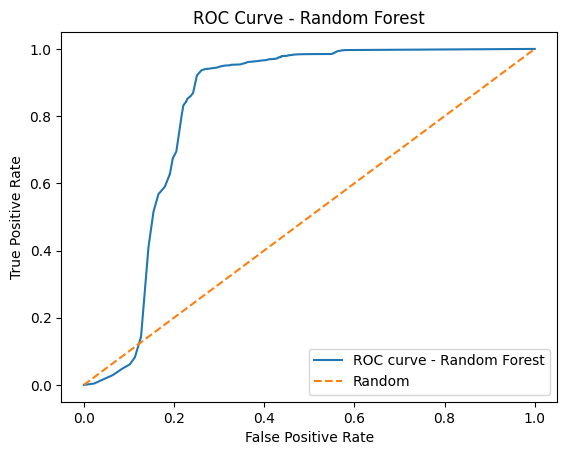

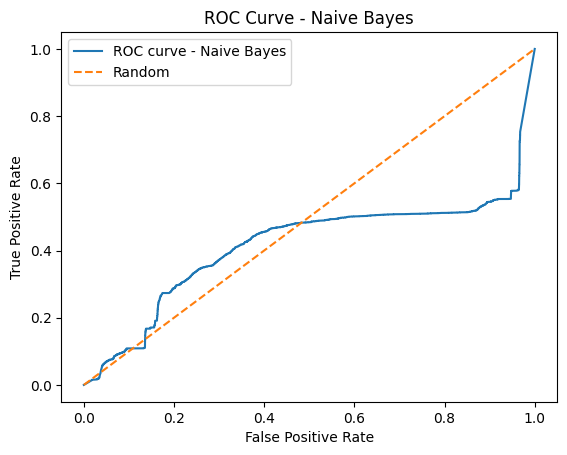

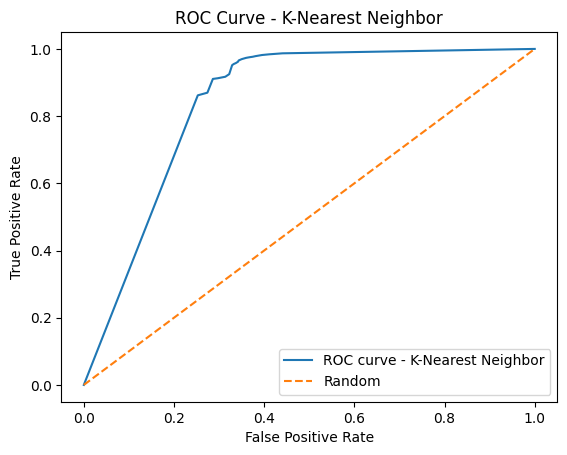

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

for key in models.keys():
    plt.figure()

    if hasattr(models[key], "decision_function"):
        # para decision_function para modelos como LinearSVC
        fpr, tpr, _ = roc_curve(y_test, models[key].decision_function(x_test))
    else:
        # usa predict_proba para modelos que lo implementan, como RandomForest, LogisticRegression
        fpr, tpr, _ = roc_curve(y_test, models[key].predict_proba(x_test)[:, 1])

    plt.plot(fpr, tpr, label=f'ROC curve - {key}')
    plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {key}')
    plt.legend()
    plt.show()


Resultados final: Como podemos ver, los clasificadores de árboles de decisión aleatorios son los mejores predictores para nuestro modelo

# Implementacion de XGBoost_model

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier


## En este ejemplo, el valor usaremos un random_state de  42 se usa como semilla para el generador de números aleatorios comunmente, lo que garantiza que los resultados sean consistentes cada vez que se entrene el modelo con los mismos datos.

In [ ]:
XGBoost_model = XGBClassifier(random_state = 42)


In [ ]:
XGBoost = XGBoost_model.fit(x_train, y_train)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

In [ ]:
x_train#it's a helper function in order to evaluate our model if it's overfit or underfit.
def eval_metric(model, x_train, y_train, x_test, y_test):
    y_train_pred = model.predict(x_train)
    y_pred = model.predict(x_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
eval_metric(XGBoost_model, x_train, y_train, x_test, y_test)


Test_Set
[[8147 4686]
 [ 330 9381]]
              precision    recall  f1-score   support

           0       0.96      0.63      0.76     12833
           1       0.67      0.97      0.79      9711

    accuracy                           0.78     22544
   macro avg       0.81      0.80      0.78     22544
weighted avg       0.83      0.78      0.78     22544


Train_Set
[[58615    15]
 [   27 67316]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58630
           1       1.00      1.00      1.00     67343

    accuracy                           1.00    125973
   macro avg       1.00      1.00      1.00    125973
weighted avg       1.00      1.00      1.00    125973



#Añadiendo los resultados del modelo a df_model

In [ ]:
# Supongamos que eval_metric retorna un diccionario con las métricas
def eval_metric(model, x_train, y_train, x_test, y_test):
    from sklearn.metrics import accuracy_score, precision_score, recall_score

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    return {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall}

# Evalúa el modelo XGBoost
metrics = eval_metric(XGBoost_model, x_train, y_train, x_test, y_test)

# Crea un DataFrame temporal con los nuevos resultados
new_row = pd.DataFrame({
    'Accuracy': [metrics['Accuracy']],
    'Precision': [metrics['Precision']],
    'Recall': [metrics['Recall']]
}, index=[XGBoost_model.__class__.__name__])

# Añade la nueva fila al DataFrame existente
df_model = pd.concat([df_model, new_row])

print(df_model)

                                   Accuracy  Precision    Recall
Logistic Regression                0.717131   0.943981  0.611133
Support Vector Machines linear     0.723873   0.955617  0.615630
Support Vector Machines plonomial  0.764416   0.962723  0.653868
Support Vector Machines RBf        0.772933   0.957368  0.663977
Decision Trees                     0.751153   0.933375  0.646182
Random Forest                      0.743834   0.971991  0.631709
Naive Bayes                        0.546265   0.440634  0.471463
K-Nearest Neighbor                 0.788946   0.962002  0.680358
XGBClassifier                      0.777502   0.666880  0.966018


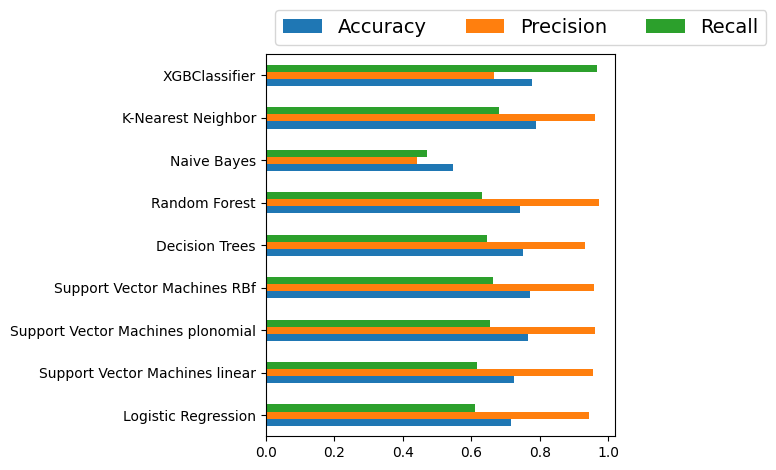

In [ ]:
ax = df_model.plot.barh()
ax.legend(
    ncol=len(models.keys()),
    bbox_to_anchor=(0, 1),
    loc='lower left',
    prop={'size': 14}
)
plt.tight_layout()

* Análisis de resultado de XGboost
El modelo XGBClassifier muestra un desempeno destacable en terminos de recall (96.60%), lo que indica que es altamente efectivo en identificar correctamente los verdaderos positivos. Esto lo convierte en una excelente opción para problemas donde los falsos negativos tienen un impacto crítico, como en detección de enfermedades, fraudes o fallos en sistemas.

* Sin embargo, su precisión es relativamente baja (66.69%), lo que sugiere un mayor número de falsos positivos. Esto podría ser una desventaja en escenarios donde es importante minimizar las alarmas incorrectas.